In [30]:
import pickle

# List of dictionaries to store
dicts_to_store = {
    'results_pfl_no_fair': 1,
    'results_pfl_with_fair': 1,
    'results_dfl_no_fair': 1,
    'results_dfl_with_fair': 1,
    'results_dfl_with_fair_fin_diff_1': 1,
    'results_dfl_with_fair_fin_diff_2': 1,
    'time_results_findiff_solver': 1,
    'time_results_findiff_cf': 1
}

# Load dictionaries from local files
loaded_dicts = {}
for name in dicts_to_store.keys():
    with open(f'{name}.pkl', 'rb') as f:
        loaded_dicts[name] = pickle.load(f)

# Access loaded dictionaries
results_pfl_no_fair = loaded_dicts['results_pfl_no_fair']
results_pfl_with_fair = loaded_dicts['results_pfl_with_fair']
results_dfl_no_fair = loaded_dicts['results_dfl_no_fair']
results_dfl_with_fair = loaded_dicts['results_dfl_with_fair']
results_dfl_with_fair_fin_diff_1 = loaded_dicts['results_dfl_with_fair_fin_diff_1']
results_dfl_with_fair_fin_diff_2 = loaded_dicts['results_dfl_with_fair_fin_diff_2']
time_results_findiff_solver = loaded_dicts['time_results_findiff_solver']
time_results_findiff_cf = loaded_dicts['time_results_findiff_cf']

In [31]:
912*

SyntaxError: invalid syntax (988775073.py, line 1)

In [9]:
time_results_findiff_solver, time_results_findiff_cf

({'mean_train_loss': array([383342.6875]),
  'mean_test_regret': array([16.16029167]),
  'mean_test_mse': array([51.28242111]),
  'mean_test_fair': array([0.00475574]),
  'std_train_loss': array([0.]),
  'std_test_regret': array([0.]),
  'std_test_mse': array([0.]),
  'std_test_fair': array([0.]),
  'total_times': 912.3255391120911,
  'mean_time': 912.3255391120911,
  'std_time': 0.0,
  'all_train_time': [912.3255391120911]},
 {'mean_train_loss': array([59845.17578125]),
  'mean_test_regret': array([14.74270439]),
  'mean_test_mse': array([51.29411316]),
  'mean_test_fair': array([0.00810409]),
  'std_train_loss': array([0.]),
  'std_test_regret': array([0.]),
  'std_test_mse': array([0.]),
  'std_test_fair': array([0.]),
  'total_times': 0.5036752223968506,
  'mean_time': 0.5036752223968506,
  'std_time': 0.0,
  'all_train_time': [0.5036752223968506]})

In [7]:
import pandas as pd

# Extract summary data for each method
methods = ['2-Stage No Fairness', '2-Stage With Fairness', 'DFL No Fairness',
           'DFL With Fairness (Closed-Form)', 'DFL With Fairness (DBB)', 'DFL With Fairness (DBB 2)']

# Combine all results into a summary
data = {
    'Method': methods,
    'MSE (Mean ± Std)': [
        f"{results_pfl_no_fair['mean_test_mse'][-1]:.2f} ± {results_pfl_no_fair['std_test_mse'][-1]:.2f}",
        f"{results_pfl_with_fair['mean_test_mse'][-1]:.2f} ± {results_pfl_with_fair['std_test_mse'][-1]:.2f}",
        f"{results_dfl_no_fair['mean_test_mse'][-1]:.2f} ± {results_dfl_no_fair['std_test_mse'][-1]:.2f}",
        f"{results_dfl_with_fair['mean_test_mse'][-1]:.2f} ± {results_dfl_with_fair['std_test_mse'][-1]:.2f}",
        f"{results_dfl_with_fair_fin_diff_1['mean_test_mse'][-1]:.2f} ± {results_dfl_with_fair_fin_diff_1['std_test_mse'][-1]:.2f}",
        f"{results_dfl_with_fair_fin_diff_2['mean_test_mse'][-1]:.2f} ± {results_dfl_with_fair_fin_diff_2['std_test_mse'][-1]:.2f}"
    ],
    'Regret (Mean ± Std)': [
        f"{results_pfl_no_fair['mean_test_regret'][-1]:.2f} ± {results_pfl_no_fair['std_test_regret'][-1]:.2f}",
        f"{results_pfl_with_fair['mean_test_regret'][-1]:.2f} ± {results_pfl_with_fair['std_test_regret'][-1]:.2f}",
        f"{results_dfl_no_fair['mean_test_regret'][-1]:.2f} ± {results_dfl_no_fair['std_test_regret'][-1]:.2f}",
        f"{results_dfl_with_fair['mean_test_regret'][-1]:.2f} ± {results_dfl_with_fair['std_test_regret'][-1]:.2f}",
        f"{results_dfl_with_fair_fin_diff_1['mean_test_regret'][-1]:.2f} ± {results_dfl_with_fair_fin_diff_1['std_test_regret'][-1]:.2f}",
        f"{results_dfl_with_fair_fin_diff_2['mean_test_regret'][-1]:.2f} ± {results_dfl_with_fair_fin_diff_2['std_test_regret'][-1]:.2f}"
    ],
    'Fairness (Mean ± Std)': [
        f"{results_pfl_no_fair['mean_test_fair'][-1]:.3f} ± {results_pfl_no_fair['std_test_fair'][-1]:.3f}",
        f"{results_pfl_with_fair['mean_test_fair'][-1]:.3f} ± {results_pfl_with_fair['std_test_fair'][-1]:.3f}",
        f"{results_dfl_no_fair['mean_test_fair'][-1]:.3f} ± {results_dfl_no_fair['std_test_fair'][-1]:.3f}",
        f"{results_dfl_with_fair['mean_test_fair'][-1]:.3f} ± {results_dfl_with_fair['std_test_fair'][-1]:.3f}",
        f"{results_dfl_with_fair_fin_diff_1['mean_test_fair'][-1]:.3f} ± {results_dfl_with_fair_fin_diff_1['std_test_fair'][-1]:.3f}",
        f"{results_dfl_with_fair_fin_diff_2['mean_test_fair'][-1]:.3f} ± {results_dfl_with_fair_fin_diff_2['std_test_fair'][-1]:.3f}"
    ],
    'Time (s)': [
        f"{results_pfl_no_fair['mean_time']:.2f}",
        f"{results_pfl_with_fair['mean_time']:.2f}",
        f"{results_dfl_no_fair['mean_time']:.2f}",
        f"{results_dfl_with_fair['mean_time']:.2f}",
        f"{results_dfl_with_fair_fin_diff_1['mean_time']:.2f}",
        f"{results_dfl_with_fair_fin_diff_2['mean_time']:.2f}"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Export the DataFrame to LaTeX
latex_table = df.to_latex(index=False, column_format='lcccc', caption='Performance Comparison Across Methods')
print(latex_table)


\begin{table}
\caption{Performance Comparison Across Methods}
\begin{tabular}{lcccc}
\toprule
Method & MSE (Mean ± Std) & Regret (Mean ± Std) & Fairness (Mean ± Std) & Time (s) \\
\midrule
2-Stage No Fairness & 16.87 ± 1.91 & 9.71 ± 0.40 & 1.742 ± 0.291 & 0.28 \\
2-Stage With Fairness & 16.49 ± 1.97 & 10.03 ± 0.49 & 1.398 ± 0.288 & 0.19 \\
DFL No Fairness & 23.07 ± 2.35 & 1.48 ± 0.24 & 1.329 ± 0.217 & 16.73 \\
DFL With Fairness (Closed-Form) & 23.03 ± 2.41 & 1.48 ± 0.25 & 1.304 ± 0.218 & 17.11 \\
DFL With Fairness (DBB) & 44.22 ± 4.44 & 4.38 ± 4.80 & 0.047 ± 0.032 & 38.50 \\
DFL With Fairness (DBB 2) & 45.58 ± 3.97 & 4.87 ± 0.67 & 0.204 ± 0.051 & 32.68 \\
\bottomrule
\end{tabular}
\end{table}



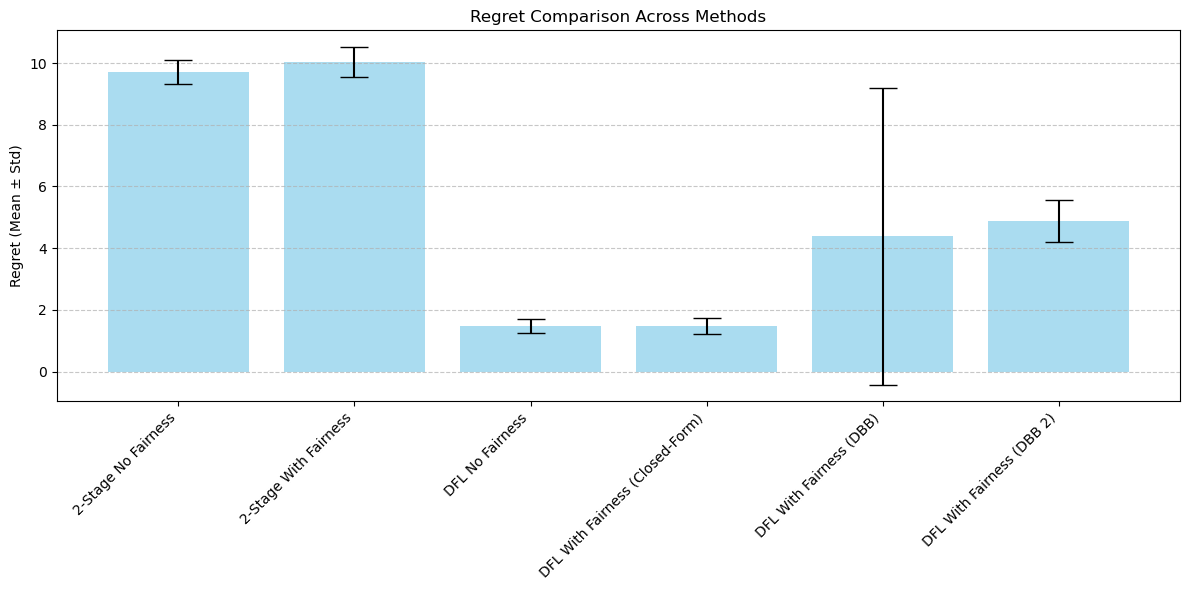

In [ ]:
# Extract regret metrics
regret_means = [
    results_pfl_no_fair['mean_test_regret'][-1],
    results_pfl_with_fair['mean_test_regret'][-1],
    results_dfl_no_fair['mean_test_regret'][-1],
    results_dfl_with_fair['mean_test_regret'][-1],
    results_dfl_with_fair_fin_diff_1['mean_test_regret'][-1],
    results_dfl_with_fair_fin_diff_2['mean_test_regret'][-1],
]

regret_stds = [
    results_pfl_no_fair['std_test_regret'][-1],
    results_pfl_with_fair['std_test_regret'][-1],
    results_dfl_no_fair['std_test_regret'][-1],
    results_dfl_with_fair['std_test_regret'][-1],
    results_dfl_with_fair_fin_diff_1['std_test_regret'][-1],
    results_dfl_with_fair_fin_diff_2['std_test_regret'][-1],
]

# Plot the regret comparison
x_pos = np.arange(len(methods))

plt.figure(figsize=(12, 6))
plt.bar(x_pos, regret_means, yerr=regret_stds, align='center', alpha=0.7, capsize=10, color='skyblue')
plt.xticks(x_pos, methods, rotation=45, ha='right')
plt.ylabel('Regret (Mean ± Std)')
plt.title('Regret Comparison Across Methods')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


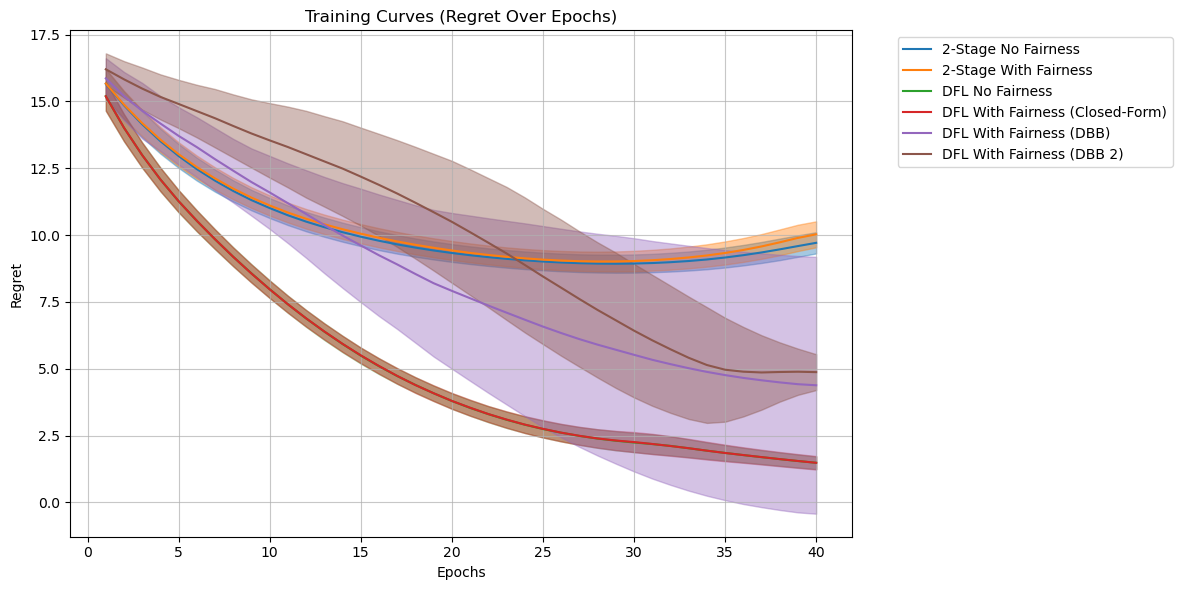

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Define epochs
epochs = np.arange(1, len(results_pfl_no_fair['mean_test_regret']) + 1)

# Define a color palette that is more distinguishable
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(12, 6))

# Plot regret for all methods with different colors
plt.plot(epochs, results_pfl_no_fair['mean_test_regret'], label='2-Stage No Fairness', color=colors[0])
plt.fill_between(epochs, 
                 results_pfl_no_fair['mean_test_regret'] - results_pfl_no_fair['std_test_regret'],
                 results_pfl_no_fair['mean_test_regret'] + results_pfl_no_fair['std_test_regret'], 
                 alpha=0.4, color=colors[0])

plt.plot(epochs, results_pfl_with_fair['mean_test_regret'], label='2-Stage With Fairness', color=colors[1])
plt.fill_between(epochs, 
                 results_pfl_with_fair['mean_test_regret'] - results_pfl_with_fair['std_test_regret'],
                 results_pfl_with_fair['mean_test_regret'] + results_pfl_with_fair['std_test_regret'], 
                 alpha=0.4, color=colors[1])

plt.plot(epochs, results_dfl_no_fair['mean_test_regret'], label='DFL No Fairness', color=colors[2])
plt.fill_between(epochs, 
                 results_dfl_no_fair['mean_test_regret'] - results_dfl_no_fair['std_test_regret'],
                 results_dfl_no_fair['mean_test_regret'] + results_dfl_no_fair['std_test_regret'], 
                 alpha=0.4, color=colors[2])

plt.plot(epochs, results_dfl_with_fair['mean_test_regret'], label='DFL With Fairness (Closed-Form)', color=colors[3])
plt.fill_between(epochs, 
                 results_dfl_with_fair['mean_test_regret'] - results_dfl_with_fair['std_test_regret'],
                 results_dfl_with_fair['mean_test_regret'] + results_dfl_with_fair['std_test_regret'], 
                 alpha=0.4, color=colors[3])

plt.plot(epochs, results_dfl_with_fair_fin_diff_1['mean_test_regret'], label='DFL With Fairness (DBB)', color=colors[4])
plt.fill_between(epochs, 
                 results_dfl_with_fair_fin_diff_1['mean_test_regret'] - results_dfl_with_fair_fin_diff_1['std_test_regret'],
                 results_dfl_with_fair_fin_diff_1['mean_test_regret'] + results_dfl_with_fair_fin_diff_1['std_test_regret'], 
                 alpha=0.4, color=colors[4])

plt.plot(epochs, results_dfl_with_fair_fin_diff_2['mean_test_regret'], label='DFL With Fairness (DBB 2)', color=colors[5])
plt.fill_between(epochs, 
                 results_dfl_with_fair_fin_diff_2['mean_test_regret'] - results_dfl_with_fair_fin_diff_2['std_test_regret'],
                 results_dfl_with_fair_fin_diff_2['mean_test_regret'] + results_dfl_with_fair_fin_diff_2['std_test_regret'], 
                 alpha=0.4, color=colors[5])

plt.xlabel('Epochs')
plt.ylabel('Regret')
plt.title('Training Curves (Regret Over Epochs)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()


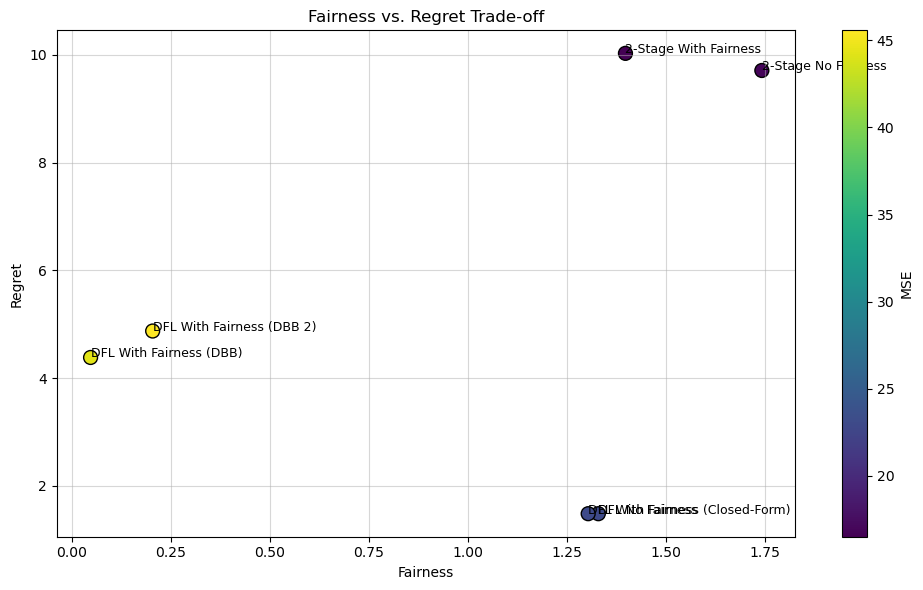

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
methods = ['2-Stage No Fairness', '2-Stage With Fairness', 'DFL No Fairness',
           'DFL With Fairness (Closed-Form)', 'DFL With Fairness (DBB)', 'DFL With Fairness (DBB 2)']

fairness_means = [
    results_pfl_no_fair['mean_test_fair'][-1],
    results_pfl_with_fair['mean_test_fair'][-1],
    results_dfl_no_fair['mean_test_fair'][-1],
    results_dfl_with_fair['mean_test_fair'][-1],
    results_dfl_with_fair_fin_diff_1['mean_test_fair'][-1],
    results_dfl_with_fair_fin_diff_2['mean_test_fair'][-1],
]

regret_means = [
    results_pfl_no_fair['mean_test_regret'][-1],
    results_pfl_with_fair['mean_test_regret'][-1],
    results_dfl_no_fair['mean_test_regret'][-1],
    results_dfl_with_fair['mean_test_regret'][-1],
    results_dfl_with_fair_fin_diff_1['mean_test_regret'][-1],
    results_dfl_with_fair_fin_diff_2['mean_test_regret'][-1],
]

mse_means = [
    results_pfl_no_fair['mean_test_mse'][-1],
    results_pfl_with_fair['mean_test_mse'][-1],
    results_dfl_no_fair['mean_test_mse'][-1],
    results_dfl_with_fair['mean_test_mse'][-1],
    results_dfl_with_fair_fin_diff_1['mean_test_mse'][-1],
    results_dfl_with_fair_fin_diff_2['mean_test_mse'][-1],
]

# Scatter plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(fairness_means, regret_means, c=mse_means, cmap='viridis', s=100, edgecolor='k')
plt.colorbar(sc, label='MSE')
for i, method in enumerate(methods):
    plt.text(fairness_means[i], regret_means[i], method, fontsize=9)

plt.xlabel('Fairness')
plt.ylabel('Regret')
plt.title('Fairness vs. Regret Trade-off')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()
